In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture
from patsy import dmatrices, dmatrix
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.utils import resample
from sklearn.cluster import AgglomerativeClustering

**Dataset**

In [47]:
df = df1 = pd.read_csv("/content/mcdonalds.csv")

In [48]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [49]:
df.shape

(1453, 15)

In [50]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [51]:
df = df.replace("Yes", 1).replace("No", 0)
MD = df.iloc[:, 0:11].values
means = np.mean(MD, axis=0).round(2)
print(means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


**PCA**

In [52]:
pca = PCA()
pca = pca.fit(MD)

std_dev = np.sqrt(pca.explained_variance_)
proportion_variance = pca.explained_variance_ratio_
cummulative_proportion = np.cumsum(pca.explained_variance_ratio_)

print("Standard Deviation: ", std_dev)
print("Proportion of Variance", proportion_variance)
print("Cumulative Proportion", cummulative_proportion)

Standard Deviation:  [0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]
Proportion of Variance [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative Proportion [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [53]:
pca_results = pca.fit_transform(MD)
print(np.round(std_dev, 1))

[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


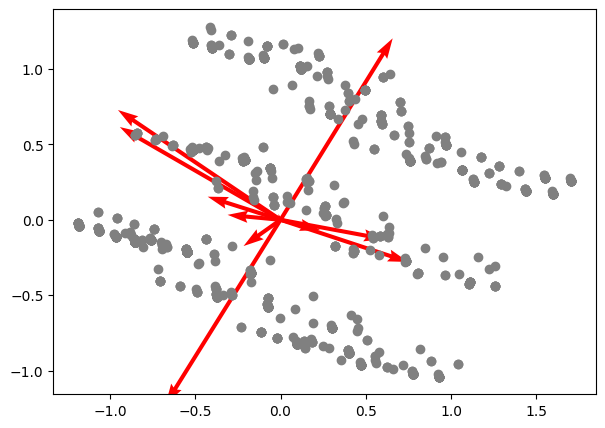

In [54]:
MD_pca = pca.components_.T
for i in range(11):
    plt.quiver(0, 0, MD_pca[i][0], MD_pca[i][1], angles='xy', scale_units='xy', scale=0.5, color='red')
plt.scatter(pca_results[:, 0], pca_results[:, 1], color='grey')
plt.show()


**K-Means**

In [55]:
np.random.seed(1234)
MD_km28 = {}
within_cluster_distances =[]
range = range(1, 9)
for r in range:
    kmeans = KMeans(n_clusters=r, n_init=10, random_state=1234)
    kmeans.fit(MD)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(r)] = kmeans


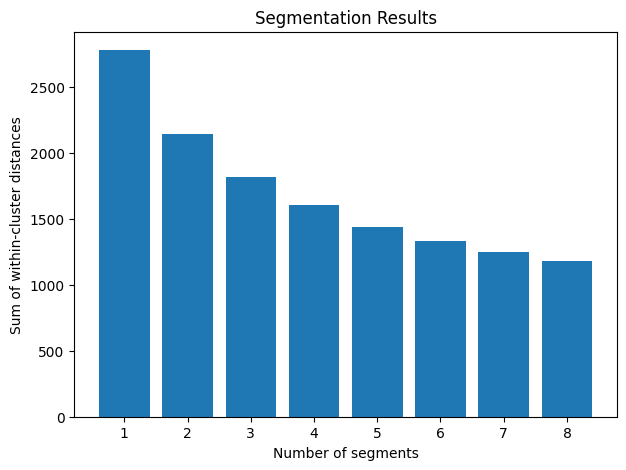

In [56]:
plt.bar(range, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

**BootStraping**

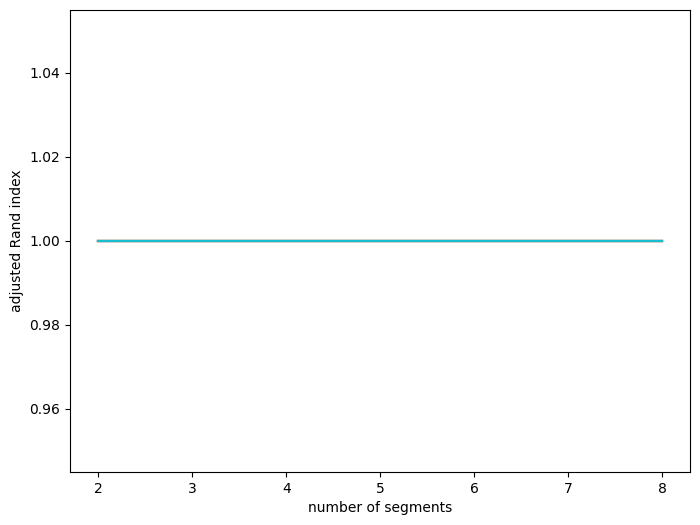

In [60]:
np.random.seed(1234)
nrep = 10
nboot = 100
ari_scores = []

for n_clusters in range(2, 9):
    ari_scores_for_n = []
    for _ in range(nrep):
        ari_scores_for_boot = []
        for _ in range(nboot):

            X_boot = resample(MD)


            model = AgglomerativeClustering(n_clusters=n_clusters)
            labels = model.fit_predict(X_boot)


            ari = adjusted_rand_score(labels, labels)
            ari_scores_for_boot.append(ari)
        ari_scores_for_n.append(np.mean(ari_scores_for_boot))
    ari_scores.append(ari_scores_for_n)


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), ari_scores)
plt.xlabel('number of segments')
plt.ylabel('adjusted Rand index')
plt.show()

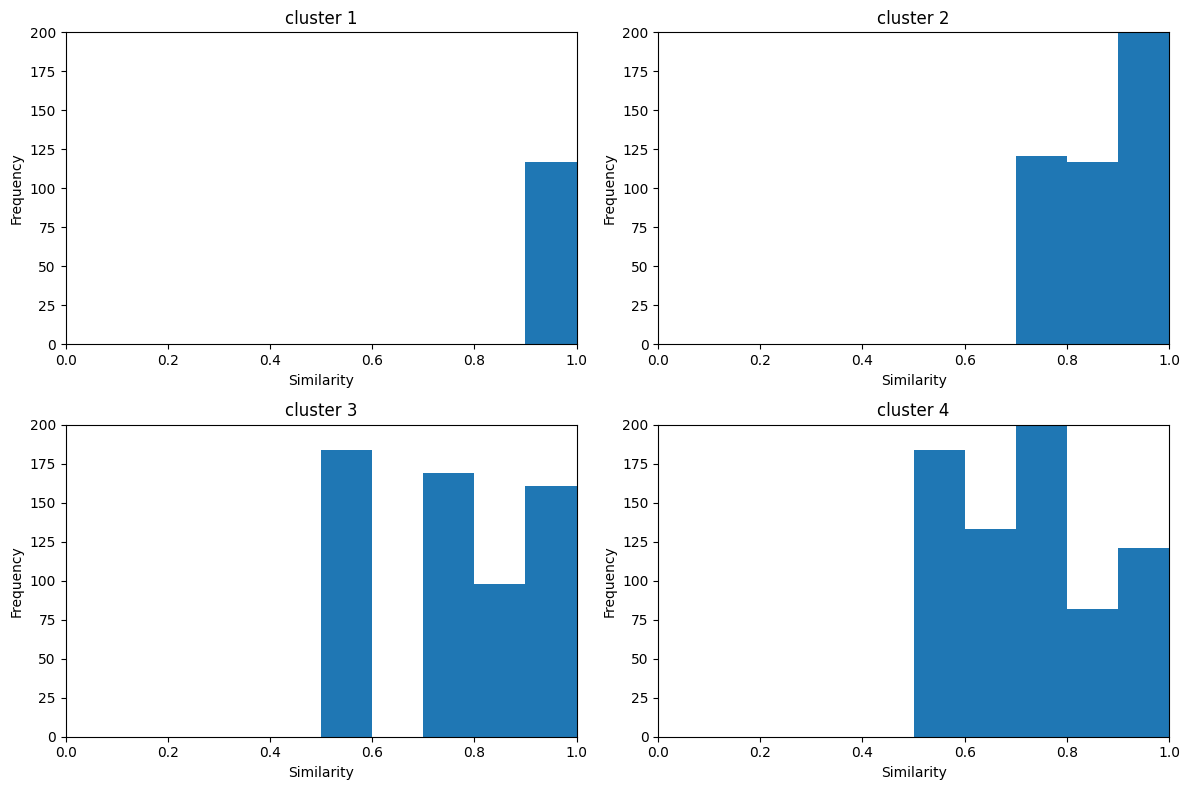

In [61]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200

fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    if str(i) in MD_km28:
        labels = MD_km28[str(i)].predict(MD)
        similarities = MD_km28[str(i)].transform(MD).min(axis=1)
        row = (i - 1) // 2
        col = (i - 1) % 2

        axs[row, col].hist(similarities, bins=num_bins, range=range_values)
        axs[row, col].set_xlabel('Similarity')
        axs[row, col].set_ylabel('Frequency')
        axs[row, col].set_title('cluster {}'.format(i))

        axs[row, col].set_xlim(range_values)
        axs[row, col].set_ylim(0, max_frequency)

        axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

In [62]:
MD_k4 = MD_km28['4']

In [63]:
sett = set(MD_k4.labels_)
MD_r4 = KMeans(n_clusters=len(sett), random_state=42).fit_predict(MD)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


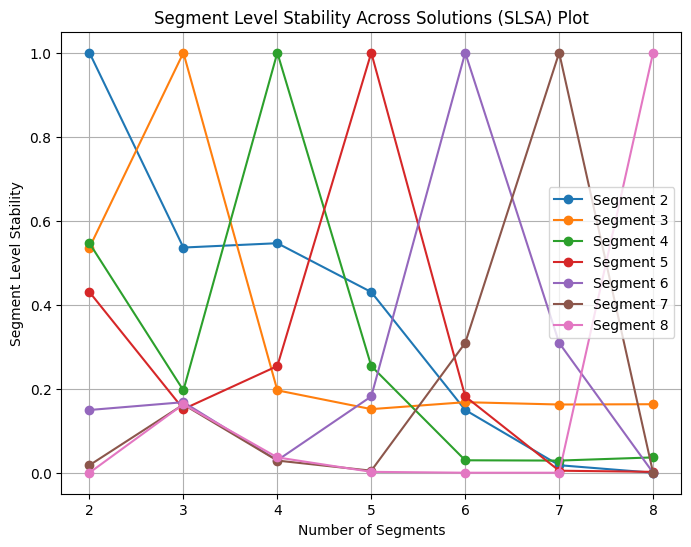

In [64]:
num_segments= range(2,9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

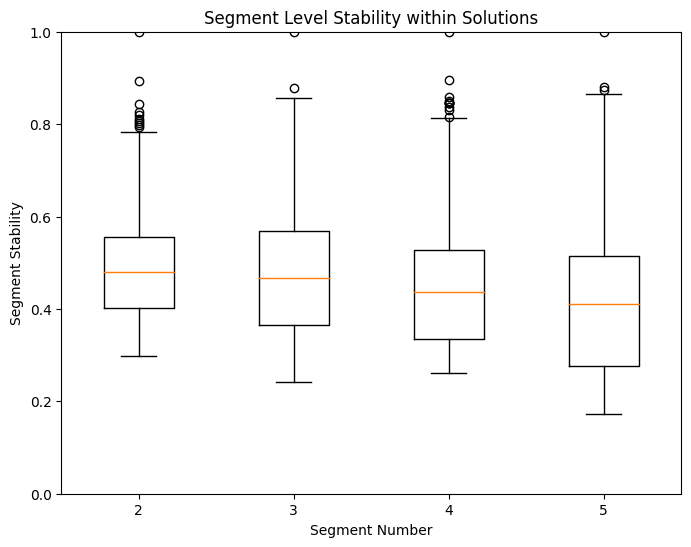

In [65]:
segment_solutions = ["2", "3", "4", "5"]
segment_stability_values = []

for segment in segment_solutions:
    labels = MD_km28[segment].predict(MD)
    similarities = MD_km28[segment].transform(MD).min(axis=1)
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.figure(figsize=(8, 6))
plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")
plt.show()

In [66]:
np.random.seed(1234)
k_values = range(2, 9)
MD_new = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234, n_init=10)
    model.fit(MD)
    iter_val = model.n_iter_
    log_likelihood = -model.inertia_
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(MD.shape[0]) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / counts.sum()
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_new.append((iter_val, k, log_likelihood, aic, bic, icl))

MD_new = pd.DataFrame(MD_new, columns=['iter', 'k', 'logLik', 'AIC', 'BIC', 'ICL'])
print(MD_new)

   iter  k       logLik          AIC          BIC          ICL
0     6  2 -2145.503727  4295.007454  4305.570225  4304.904547
1     6  3 -1818.717659  3643.435318  3659.279475  3658.209672
2     9  4 -1604.107292  3216.214583  3237.340126  3235.989403
3    11  5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8  6 -1331.652440  2675.304880  2706.993194  2705.228430
5     6  7 -1248.417887  2510.835774  2547.805474  2545.884829
6     9  8 -1182.100019  2380.200037  2422.451123  2420.433939


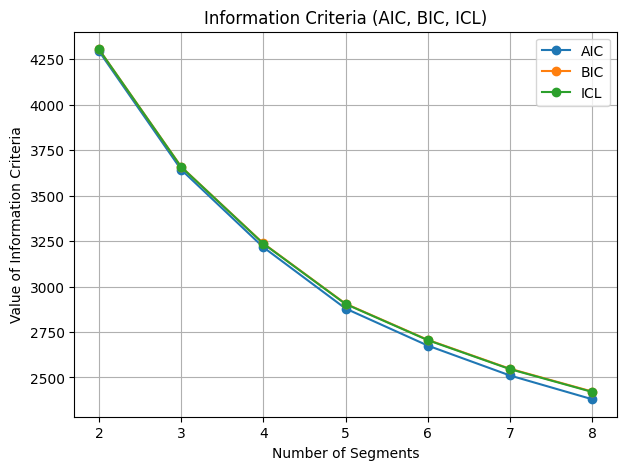

In [67]:
num_segments = MD_new["k"]
AIC_values = MD_new["AIC"]
BIC_values = MD_new["BIC"]
ICL_values = MD_new["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [68]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234,n_init=10)
kmeans.fit(MD)
kmeans_clusters = kmeans.predict(MD)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234,n_init=10)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


In [69]:
gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD)

log_likelihood_m4a = gmm_m4a.score(MD)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD)

log_likelihood_m4 = gmm_m4.score(MD)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 11.727872558164462
Log-likelihood for MD.m4: 11.151316714845965


In [70]:
like_counts = pd.value_counts(df['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [71]:
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

df['Like.n'] = df['Like'].map(like_mapping)


like_n_counts = df['Like.n'].value_counts()


print(like_n_counts)

Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [72]:
independent_vars = df.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=df)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [73]:
np.random.seed(1234)

X = dmatrix(f.design_info, data=df)
y = dmatrix('Like', data=df)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


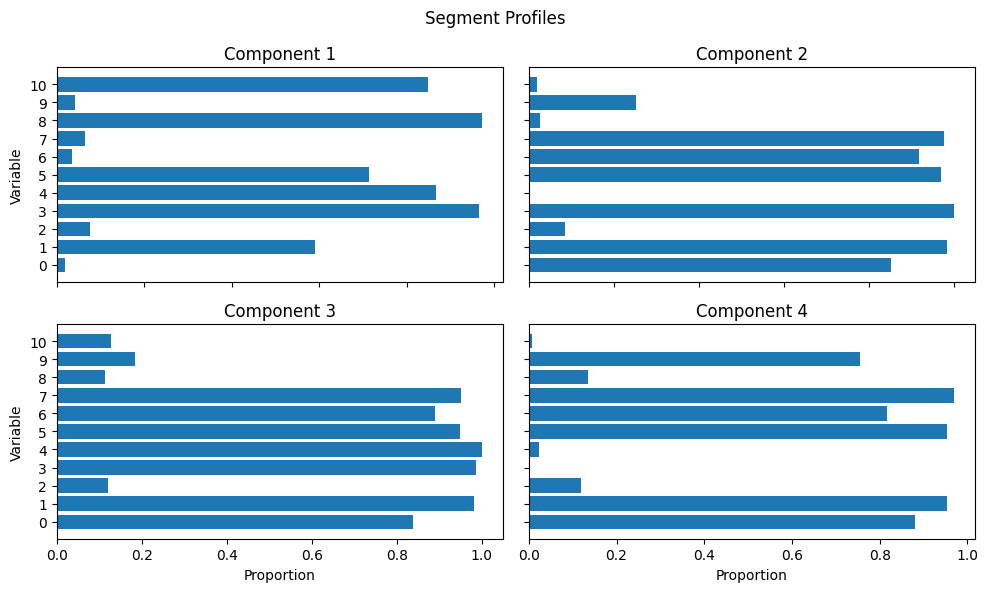

In [74]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
MD=pd.DataFrame(MD)
MD_mean = MD.groupby(labels).mean()

axs[0, 0].barh(range(means.shape[0]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


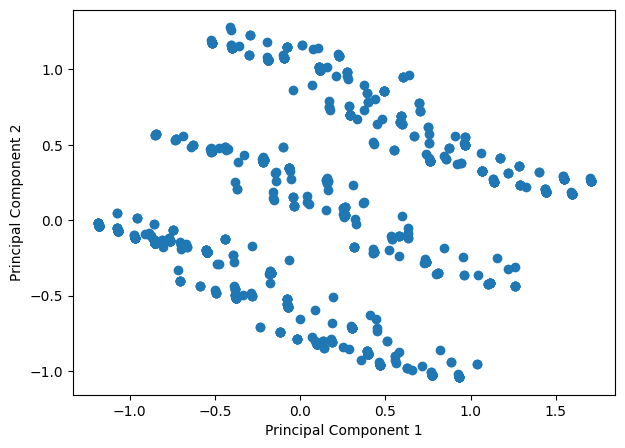

In [75]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(MD)

pca = PCA(n_components=2)

plt.scatter(pca_results[:, 0], pca_results[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


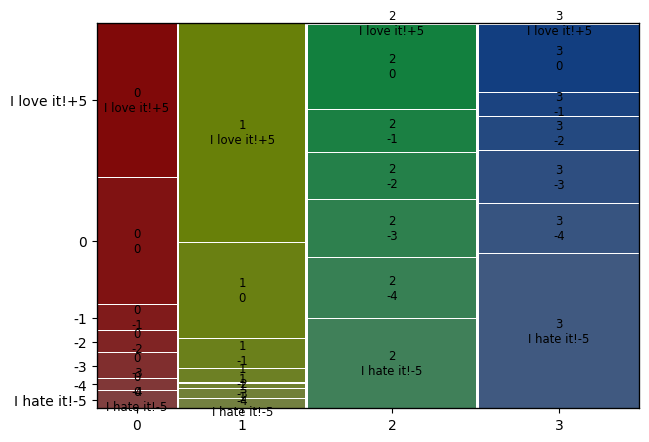

In [76]:
def labelling(x):
    df1[x] = LabelEncoder().fit_transform(df1[x])
    return df1

vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

for i in vars:
    labelling(i)
df1
df_new = df1.loc[:,vars]
df_new
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_new)
df1['cluster_num'] = kmeans.labels_
check =pd.crosstab(df1['cluster_num'],df1['Like'])

df1
check = check[['I hate it!-5','-4','-3','-2','-1','0','I love it!+5']]
check
plt.rcParams['figure.figsize'] = (7,5)
mosaic(check.stack())
plt.show()

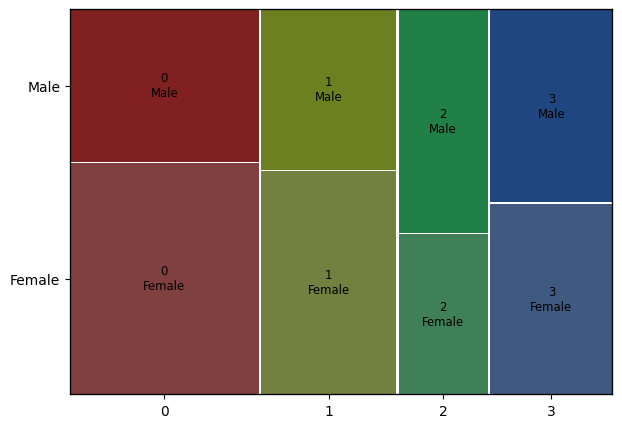

In [77]:
MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, df['Gender'])
ct
mosaic(ct.stack())

plt.show()

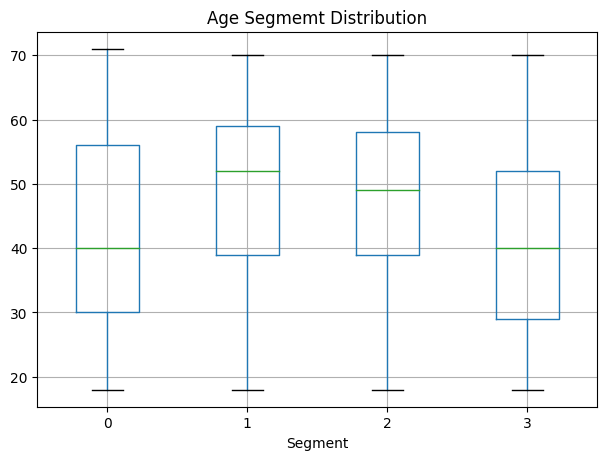

In [78]:
df = pd.DataFrame({'Segment': k4, 'Age': df['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Age Segmemt Distribution')
plt.suptitle('')
plt.show()

In [79]:
df1['VisitFrequency'] = LabelEncoder().fit_transform(df1['VisitFrequency'])
visit = df1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [80]:
df1['Like'] = LabelEncoder().fit_transform(df1['Like'])
Like = df1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [81]:
df1['Gender'] = LabelEncoder().fit_transform(df1['Gender'])
Gender = df1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


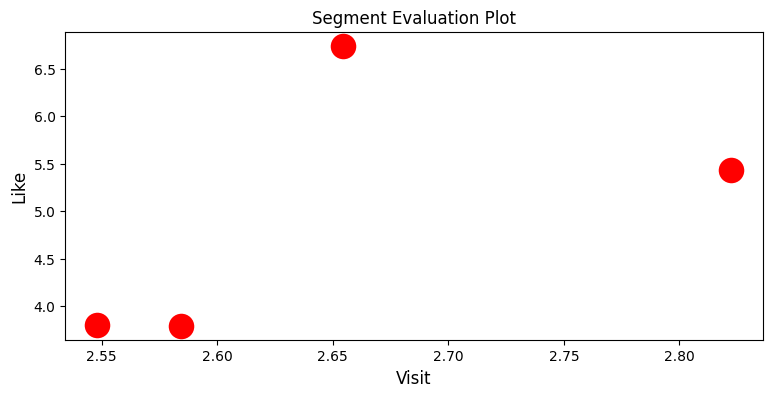

In [82]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Segment Evaluation Plot")
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()